# Cauchy Density Function - Monte Carlo Simulation

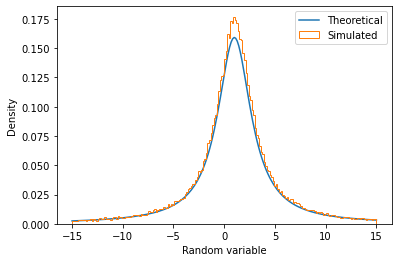

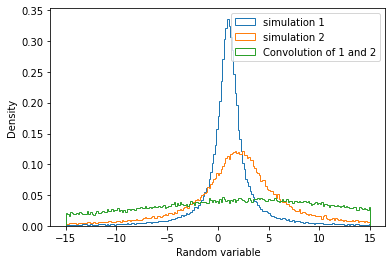

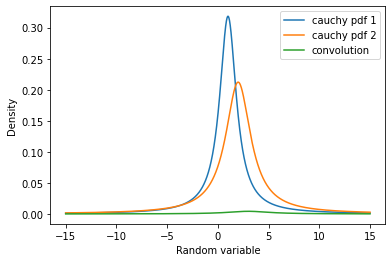

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Monte Carlo Simulation
class MonteCarlo: #defining a class named MonteCarlo
    def __init__(self,x_min=None,x_max=None,num_points=None,gamma=None,x0=None): #defining the parameters for the objects of the class.
        self.x_min=x_min
        self.x_max=x_max
        self.num_points=num_points
        self.gamma=gamma
        self.x0=x0
        self.seed=int(time.time()) # Setting the seed to the current time to generate a different set of random numbers each time the class is initialized.
        np.random.seed(self.seed) # Setting the seed for NumPy's random number generator to the seed we just generated above.

    def theoretical(self):
        x=np.linspace(self.x_min,self.x_max,self.num_points)
        f=self.gamma/((np.pi)*((self.gamma)**2+(x-self.x0)**2)) #defining a  function which makes the theoretical part of pdf
        return x,f

    def simulated(self,num_samples=100000,gamma=None,x0=None): #simulating the values(montecarlo method)
        if gamma is None:
            gamma=self.gamma
        if x0 is None:
            x0=self.x0
        xs=np.random.rand(num_samples)
        fs=(gamma)*(np.tan(np.pi*(xs-0.5)))+x0
        return fs

    def plotf(self): #plotting both theoretical and simulated distributions.
        x, f = self.theoretical()
        plt.plot(x,f,label='Theoretical')

        fs=self.simulated()
        plt.hist(fs,histtype='step',density='norm',bins=self.num_points,
                 range=(self.x_min,self.x_max),label='Simulated')

        plt.xlabel('Random variable')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

    def plotsim(self,other,num_samples=100000): #plotting the convolution of two distributions
        fs1=self.simulated(num_samples=num_samples)
        fs2=other.simulated(num_samples=num_samples,gamma=other.gamma,x0=other.x0)
        fs_conv=np.convolve(fs1,fs2,mode='same')/len(fs1)
        plt.hist(fs1,histtype='step',density='norm',bins=self.num_points,
                 range=(self.x_min,self.x_max),label='simulation 1')
        plt.hist(fs2,histtype='step',density='norm',bins=self.num_points,
                 range=(self.x_min,self.x_max),label='simulation 2')
        plt.hist(fs_conv,histtype='step',density='norm',bins=self.num_points,
                 range=(self.x_min,self.x_max), label='Convolution of 1 and 2')
        plt.xlabel('Random variable')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

monte_carlo1=MonteCarlo(-15,15,200,2,1) #defining 3 objects as per requirementd
monte_carlo2=MonteCarlo(-15,15,200,1,1)
monte_carlo3=MonteCarlo(-15,15,200,1.5,2)

monte_carlo1.plotf()
monte_carlo2.plotsim(monte_carlo3)

#convolution of two cauchy pdf is again a cauchy pdf

def cauchy(x,x0,gamma):
    return (gamma)/((np.pi)*((gamma)**2+(x-x0)**2))
x=np.linspace(-15,15,6000)
f1=cauchy(x,1,1)
f2=cauchy(x,2,1.5)
f1cf2=np.convolve(f1,f2,mode='same')/(len(x))  #Using convolve method to convolute the two cauchy pdfs.
plt.plot(x,f1,label='cauchy pdf 1')
plt.plot(x,f2,label='cauchy pdf 2')
plt.plot(x,f1cf2,label='convolution')
plt.xlabel("Random variable")
plt.ylabel("Density")
plt.legend()
plt.show()
